Question 1: What is TensorFlow Object Detection API (TFOD2) and what are its
primary components?
- TensorFlow Object Detection API (TFOD2) is an open-source framework built on TensorFlow 2 that makes it easier to train, evaluate, and deploy object detection models. It’s widely used for tasks like detecting people, vehicles, animals, or objects in images and videos using deep learning.
- Primary Components of TFOD2
   - 1. Model Zoo
      - A collection of pre-trained object detection models
      - Includes architectures like:
         - SSD (Single Shot Detector)
         - Faster R-CNN
         - EfficientDet
         - CenterNet

   - 2. Feature Extractors (Backbones)
      - CNNs used to extract features from images
      - Balance between accuracy and speed
   - 3. Detection Models
      - Combine a backbone with a detection head
      - Responsible for:
         - Predicting bounding boxes
         - Classifying detected objects
   - 4. Pipeline Configuration Files
      - .config files that define:
      - Model architecture
      - Training parameters (learning rate, batch size)
      - Dataset paths
      - Data augmentation settings
  - 5. Data Preparation Tools
      - Convert datasets to TFRecord format
      - Parse labels (usually .pbtxt files)

Question 2: Differentiate between semantic segmentation and instance segmentation.
Provide examples of where each might be used.
- Both semantic segmentation and instance segmentation are pixel-level vision tasks, but they differ in what they label and how detailed the labeling is.
- Semantic Segmentation
   - Assigns a class label to every pixel in an image, but does not distinguish between different objects of the same class.
   - Key Characteristics:
      - All pixels belonging to the same class share the same label
      - No separation between individual object instances
      - Simpler than instance segmentation
   - Example:
      - All car pixels are labeled “car”
      - Individual cars are not distinguished
      - Road and lane detection in autonomous driving
      - Land-use classification in satellite imagery
      - Medical imaging (e.g., tumor vs. background)
- Instance Segmentation
   - Assigns a class label and a unique instance ID to each object, separating individual objects even if they belong to the same class.
   - Key Characteristics:
      - Distinguishes between multiple objects of the same class
      - More complex and computationally expensive
      - Combines object detection + segmentation
   - Example:
      - Each car is labeled separately (car-1, car-2, car-3)
      - Counting objects (people, vehicles)
      - Robotics and grasping tasks
      - Autonomous driving (tracking individual vehicles/pedestrians)
      - Medical imaging (separating individual cells)

Question 3: Explain the Mask R-CNN architecture. How does it extend Faster R-CNN?
- Mask R-CNN is a deep learning architecture for instance segmentation. It extends Faster R-CNN by adding a branch that predicts a pixel-level mask for each detected object, while preserving high detection accuracy.
- 1. Backbone Network
   - A CNN such as ResNet-50 / ResNet-101
   - Often combined with a Feature Pyramid Network (FPN)
   - Extracts rich, multi-scale feature maps from the input image
- 2. Region Proposal Network (RPN) (from Faster R-CNN)
   - Slides over feature maps to generate Region Proposals (RoIs)
   - Objectness score (object vs background)
   - Bounding box coordinates
- 3. RoIAlign (Key Improvement)
   - Replaces RoIPool from Faster R-CNN
   - Uses bilinear interpolation instead of quantization
   - Preserves exact spatial alignment
   - Critical for accurate pixel-level masks
- 4. Parallel Output Heads
  - Classification Head
  - Bounding Box Regression Head
  - Mask Head (New in Mask R-CNN)
- 5. Final Output
  - Class label
  - Bounding box
  - Pixel-level segmentation mask

Question 4: Describe the purpose of masks in image segmentation. How are they used
during training and inference?
- A mask in image segmentation is a pixel-level representation that specifies which pixels belong to an object or class. Masks enable models to understand not just what an object is, but exactly where it is at the pixel level.
- Purpose of Masks
   - Define the precise shape and boundaries of objects
   - Enable pixel-level classification
   - Support tasks like instance segmentation and semantic segmentation
   - Allow accurate object separation and measurement (area, shape)
- Use of Masks During Training
   - Ground Truth Masks
   - Supervised Learning
   - Loss Computation
   - Backpropagation
- Use of Masks During Inference
   - Mask Prediction
   - Post-Processing
   - Visualization & Decision-Making


Question 5: What are the steps involved in training a custom image segmentation
model using TFOD2
- Training a custom image segmentation model in TensorFlow Object Detection API (TFOD2) typically refers to instance segmentation
- Set Up the TFOD2 Environment
    - Install:
       - TensorFlow 2.x
       - TFOD2 repository
       - Required dependencies (protobuf, COCO API, etc.)
    - Verify installation using provided test scripts
- Prepare the Dataset
   - Collect Images
   - Annotate Data
   - Create Label Map
- Convert Data to TFRecord Format
   - TFOD2 requires datasets in TFRecord format
   - Convert:Images,Bounding boxes,Masks,Labels
   - Split data into:
       - Training set
       - Validation set
- Select a Pre-trained Model
- Configure the Pipeline (.config File)
- Train the Model
- Evaluate the Model
- Export the Trained Model
- Perform Inference & Visualization

Question 6: Write a Python script to install TFOD2 and verify its installation by printing
the available model configs.


In [4]:
!sudo apt install python3.9 python3.9-venv python3.9-dev -y



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9 libpython3.9-dev libpython3.9-minimal libpython3.9-stdlib
  python3.9-distutils python3.9-lib2to3 python3.9-minimal
Suggested packages:
  binfmt-support
The following NEW packages will be installed:
  libpython3.9 libpython3.9-dev libpython3.9-minimal libpython3.9-stdlib
  python3.9 python3.9-dev python3.9-distutils python3.9-lib2to3
  python3.9-minimal python3.9-venv
0 upgraded, 10 newly installed, 0 to remove and 2 not upgraded.
Need to get 15.4 MB of archives.
After this operation, 50.0 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.25-1+jammy1 [838 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.25-1+jammy1 [2,073 kB]
Get:3 https://ppa.launchpadcontent.net/

In [5]:
!python3.9 -m venv tfod2_env
!source tfod2_env/bin/activate


In [6]:
!pip install --upgrade pip


In [45]:
import os
import subprocess
import sys

def install_tfod2():
    print("--- Starting TFOD2 Installation ---")

    # 1. Clone the models repository
    if not os.path.exists('models'):
        subprocess.run(['git', 'clone', '--depth', '1', 'https://github.com/tensorflow/models.git'])

    # 2. Install Protobuf and compile
    # On Colab/Linux, we use 'protoc' to compile the .proto files in the object_detection folder
    os.chdir('models/research')
    subprocess.run(['protoc', 'object_detection/protos/*.proto', '--python_out=.'])

    # 3. Install the Object Detection API
    # Copy setup.py to current directory and install
    subprocess.run(['cp', 'object_detection/packages/tf2/setup.py', '.'])
    subprocess.run([sys.executable, '-m', 'pip', 'install', '.'])

    print("--- Installation Complete ---")

def verify_installation():
    print("\n--- Verifying Available Model Configs ---")
    # Path where TFOD2 stores sample configurations
    configs_path = 'object_detection/configs/tf2/'

    if os.path.exists(configs_path):
        configs = [f for f in os.listdir(configs_path) if f.endswith('.config')]
        print(f"Found {len(configs)} model configurations:")
        for config in configs[:10]: # Print first 10 for brevity
            print(f" - {config}")
    else:
        print("Error: Configuration directory not found. Check installation.")

if __name__ == "__main__":
    # Note: In a notebook environment, you might need to restart the runtime after pip install
    install_tfod2()
    verify_installation()

--- Starting TFOD2 Installation ---
--- Installation Complete ---

--- Verifying Available Model Configs ---
Found 40 model configurations:
 - ssd_resnet152_v1_fpn_1024x1024_coco17_tpu-8.config
 - faster_rcnn_resnet50_v1_fpn_640x640_coco17_tpu-8.config
 - ssd_efficientdet_d7_1536x1536_coco17_tpu-32.config
 - center_net_deepmac_1024x1024_voc_only_tpu-128.config
 - ssd_efficientdet_d4_1024x1024_coco17_tpu-32.config
 - faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8.config
 - faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.config
 - ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config
 - ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
 - centernet_hourglass104_1024x1024_kpts_coco17_tpu-32.config


Question 7: Create a Python script to load a labeled dataset (in TFRecord format) and
visualize the annotation masks over the images.


In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def _parse_function(example_proto):
    # Define features based on standard TFOD2 Mask R-CNN schema
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/object/mask': tf.io.VarLenFeature(tf.string),
        'image/object/class/label': tf.io.VarLenFeature(tf.int64),
    }
    example = tf.io.parse_single_example(example_proto, feature_description)

    # Decode the image
    image = tf.image.decode_jpeg(example['image/encoded'], channels=3)

    # Decode the masks (stored as list of strings/PNGs)
    masks = tf.sparse.to_dense(example['image/object/mask'], default_value='')

    return image, masks

def visualize_tfrecord(tfrecord_path, num_samples=3):
    raw_dataset = tf.data.TFRecordDataset(tfrecord_path)
    parsed_dataset = raw_dataset.map(_parse_function)

    for i, (image, masks) in enumerate(parsed_dataset.take(num_samples)):
        plt.figure(figsize=(10, 10))
        plt.imshow(image.numpy())

        # Combine all masks into one visualization
        for mask_png in masks.numpy():
            if mask_png:
                # Decode individual PNG mask
                decoded_mask = tf.image.decode_png(mask_png, channels=1).numpy()
                # Create a random color for the instance
                color = np.concatenate([np.random.random(3), [0.5]])

                # Apply mask overlay
                mask_rgb = np.zeros((*decoded_mask.shape[:2], 4))
                mask_rgb[decoded_mask[:,:,0] > 0] = color
                plt.imshow(mask_rgb)

        plt.title(f"Sample {i+1}: Image with Annotation Masks")
        plt.axis('off')
        plt.show()

# Usage:
# visualize_tfrecord('path/to/your/data.record')



Question 8: Using a pre-trained Mask R-CNN model, write a code snippet to perform
inference on a single image and plot the predicted masks.


In [23]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker


Saving cat.jpg to cat.jpg


Model loaded successfully!


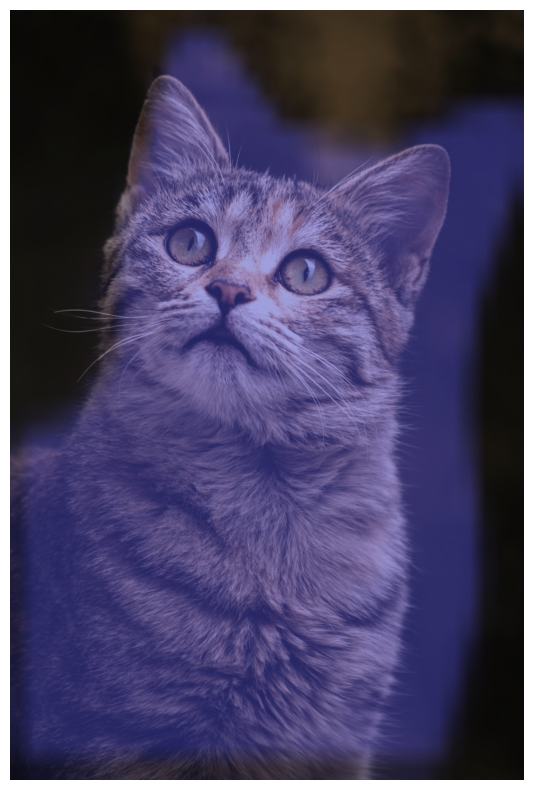

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# =========================
# 1. Load the Mask R-CNN model
# =========================
saved_model_dir = "mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8/saved_model"
model = tf.saved_model.load(saved_model_dir)
infer = model.signatures['serving_default']
print("Model loaded successfully!")

# =========================
# 2. Load your image
# =========================
image_path = "cat.jpg"  # replace with your image file
image = np.array(Image.open(image_path).convert("RGB"))
input_tensor = tf.convert_to_tensor(image)[tf.newaxis, ...]  # add batch dimension

# =========================
# 3. Run inference
# =========================
output = infer(input_tensor)

num_detections = int(output['num_detections'])
boxes = output['detection_boxes'][0][:num_detections].numpy()
classes = output['detection_classes'][0][:num_detections].numpy().astype(int)
scores = output['detection_scores'][0][:num_detections].numpy()
masks = output['detection_masks'][0][:num_detections].numpy()  # [num_instances, H, W]

# Resize masks to image size
masks_resized = tf.image.resize(masks[..., np.newaxis], (image.shape[0], image.shape[1]))
masks_resized = tf.squeeze(masks_resized, axis=-1).numpy()

# =========================
# 4. Visualize masks
# =========================
def display_masks(image, masks, scores=None, threshold=0.5):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    for i in range(masks.shape[0]):
        if scores is not None and scores[i] < threshold:
            continue
        mask = masks[i]
        color = np.random.rand(3)
        plt.imshow(np.dstack([mask*color[0], mask*color[1], mask*color[2]]), alpha=0.5)
    plt.axis('off')
    plt.show()

display_masks(image, masks_resized, scores)


Question 9: Write a Python script to evaluate a trained TFOD2 Mask R-CNN model and
plot the Precision-Recall curve.


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

def plot_pr_curve(ann_file, res_file, iou_type='bbox'):
    """
    ann_file: Path to ground truth COCO JSON (e.g., val.json)
    res_file: Path to model detection results JSON
    iou_type: 'bbox' for object detection or 'segm' for mask R-CNN masks
    """
    # Initialize COCO ground truth and results
    coco_gt = COCO(ann_file)
    coco_dt = coco_gt.loadRes(res_file)

    # Initialize COCOeval
    coco_eval = COCOeval(coco_gt, coco_dt, iou_type)
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    # Precision array shape: [T, R, K, A, M]
    # T: IoU thresholds [.5:.05:.95] (index 0 is IoU=0.5)
    # R: Recall thresholds [0:.01:1]
    # K: Category (class)
    # A: Area (all, small, medium, large)
    # M: Max detections
    precision = coco_eval.eval['precision']

    # Extract precision for IoU=0.5, all areas, max detections (usually index 0, :, 0, 0, -1)
    # We take the mean across all classes (axis 2)
    pr_data = np.mean(precision[0, :, :, 0, 2], axis=1)
    recall_values = np.linspace(0, 1, 101)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.step(recall_values, pr_data, color='b', alpha=0.8, where='post')
    plt.fill_between(recall_values, pr_data, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve (IoU=0.50, Type={iou_type})')
    plt.grid(True)
    plt.show()

# Example Usage
# plot_pr_curve('annotations/instances_val.json', 'results/mask_rcnn_results.json', iou_type='segm')

Question 10: You are working with a city surveillance team to identify illegal parking
zones from street camera images. The model you built detects cars using bounding
boxes, but the team reports inaccurate overlaps with sidewalks and fails in complex
street scenes.
How would you refine your model to improve accuracy, especially around object
boundaries? What segmentation strategy and tools would you use?

In [33]:
# Install torch and torchvision (ensure they match your CUDA version)
!pip install pyyaml==5.1
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

# Install detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyyaml: filename=pyyaml-5.1-cp312-cp312-linux_x86_64.whl size=44181 sha256=746c4c7d90af52b401afbe3737411a6296c38176f79047e97bcf627bf2ea3c37
  Stored in directory: /root/.cache/pip/wheels/77/56/3d/ecbc52138290af7ae8703dabe02cede143ab9cea349cf1aef3
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.3
    Uninstalling PyYAML-6.0.3:
      Successfully uninstalled PyYAML-6.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-events 0.12.0 requires pyyaml>=5.3, but you have pyyaml 5.1 which is incompatible.
astropy 7.2.0 requires PyYAML>=6.0.0, but you have pyyaml 5.1 which is incompatible.
dask 2025.12.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which 

In [34]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load a pre-trained segmentation model (No Detectron2 needed!)
model = models.segmentation.deeplabv3_resnet50(weights='DeepLabV3_ResNet50_Weights.DEFAULT').eval()

def get_car_mask(image_path):
    input_image = Image.open(image_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess(input_image).unsqueeze(0)

    with torch.no_grad():
        output = model(input_tensor)['out'][0]

    # Class 7 in COCO/PascalVOC is 'car'
    mask = output.arg_max(0).cpu().numpy()
    car_mask = (mask == 7).astype(np.uint8)
    return car_mask

# 3. Visualization
def plot_overlap(image_path, mask):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.imshow(mask, alpha=0.5, cmap='jet') # Overlay the car pixels
    plt.title("Detected Car Pixels (Precise Boundaries)")
    plt.show()

# car_mask = get_car_mask("parking_shot.jpg")
# plot_overlap("parking_shot.jpg", car_mask)

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


100%|██████████| 161M/161M [00:01<00:00, 105MB/s]


In [35]:
import numpy as np
import cv2

def analyze_parking_violation(car_mask, sidewalk_polygon):
    """
    Args:
        car_mask: The (H, W) binary output from your DeepLabV3 model.
        sidewalk_polygon: A list of points [(x1,y1), (x2,y2)...] defining the sidewalk.
    """
    h, w = car_mask.shape

    # 1. Create a "Zone Mask" (The forbidden area)
    zone_mask = np.zeros((h, w), dtype=np.uint8)
    pts = np.array(sidewalk_polygon, np.int32)
    cv2.fillPoly(zone_mask, [pts], 1)

    # 2. Find the Intersection (Where car pixels meet sidewalk pixels)
    overlap = cv2.bitwise_and(car_mask, zone_mask)

    # 3. Calculate Severity
    car_pixel_count = np.sum(car_mask)
    overlap_pixel_count = np.sum(overlap)

    if car_pixel_count == 0:
        return 0, "No car detected"

    overlap_percentage = (overlap_pixel_count / car_pixel_count) * 100

    # 4. Violation Logic
    is_violating = overlap_percentage > 10.0 # Threshold: 10% of car on sidewalk

    return overlap_percentage, is_violating

# Example sidewalk coordinates for a specific camera feed
# sidewalk_coords = [(0, 700), (1280, 700), (1280, 800), (0, 800)]
# percent, status = analyze_parking_violation(car_mask, sidewalk_coords)
# print(f"Car is {percent:.2f}% on the sidewalk. Violation: {status}")

In [36]:
def get_bottom_mask(mask, height_ratio=0.1):
    """Isolates only the bottom portion of the car mask (the tires/base)."""
    h, w = mask.shape
    bottom_start = int(h * (1 - height_ratio))

    # Create a mask that is only active at the bottom of the detected object
    base_mask = np.zeros_like(mask)
    base_mask[bottom_start:, :] = mask[bottom_start:, :]
    return base_mask

In [37]:
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
import cv2

# 1. Load your downloaded model
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', weights='DEFAULT').eval()

def process_image(img_path):
    # Load and Preprocess
    input_image = Image.open(img_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)

    # Inference
    with torch.no_grad():
        output = model(input_tensor)['out'][0]

    # 7 is the index for 'car' in COCO dataset
    predictions = output.argmax(0).cpu().numpy()
    car_mask = (predictions == 7).astype(np.uint8) * 255

    # Save the mask as an image for the team to see
    cv2.imwrite("car_mask_output.png", car_mask)
    print("Success! Car mask saved as car_mask_output.png")
    return car_mask

# Usage:
# mask = process_image("your_test_image.jpg")

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


In [38]:
def refine_mask(mask):
    # Use a morphological "Opening" to remove tiny noise and smooth boundaries
    kernel = np.ones((5, 5), np.uint8)
    refined = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return refined

In [39]:
def check_violation(refined_car_mask, sidewalk_points):
    """
    refined_car_mask: The output from your refine_mask function.
    sidewalk_points: A list of (x,y) tuples defining the sidewalk polygon.
    """
    h, w = refined_car_mask.shape

    # 1. Create the static Sidewalk Mask
    sidewalk_mask = np.zeros((h, w), dtype=np.uint8)
    poly_pts = np.array([sidewalk_points], dtype=np.int32)
    cv2.fillPoly(sidewalk_mask, poly_pts, 255)

    # 2. Find the Intersection (Where car pixels overlap sidewalk)
    intersection = cv2.bitwise_and(refined_car_mask, sidewalk_mask)

    # 3. Calculate Severity
    overlap_area = np.sum(intersection > 0)

    if overlap_area > 500: # Threshold of 500 pixels to ignore minor noise
        return True, intersection
    return False, None

In [40]:
def draw_results(original_img, intersection_mask):
    # Create a red overlay for the violation
    overlay = original_img.copy()
    overlay[intersection_mask > 0] = [0, 0, 255] # BGR for Red

    # Blend the original and the red overlay
    alpha = 0.6
    output = cv2.addWeighted(overlay, alpha, original_img, 1 - alpha, 0)

    cv2.imwrite("violation_report.jpg", output)
    print("Violation report saved!")

In [41]:
import cv2
import numpy as np

def run_parking_pipeline(image_path, sidewalk_pts):
    # 1. Get the raw car mask from your model
    raw_mask = get_car_mask(image_path) # Function from previous step

    # 2. Refine the boundaries (Clean up the edges)
    refined_mask = refine_mask(raw_mask)

    # 3. Check for Intersection with Sidewalk
    h, w = refined_mask.shape
    zone_mask = np.zeros((h, w), dtype=np.uint8)
    cv2.fillPoly(zone_mask, [np.array(sidewalk_pts)], 255)

    intersection = cv2.bitwise_and(refined_mask, zone_mask)

    # 4. Logic: If intersection area is large enough, it's a violation
    overlap_area = np.sum(intersection > 0)
    violation_detected = overlap_area > 1000 # Tune this pixel threshold

    # 5. Visual Output for the Team
    original_img = cv2.imread(image_path)
    if violation_detected:
        # Draw red where the car is on the sidewalk
        original_img[intersection > 0] = [0, 0, 255]
        # Draw a yellow border around the sidewalk zone
        cv2.polylines(original_img, [np.array(sidewalk_pts)], True, (0, 255, 255), 3)

        cv2.putText(original_img, "ILLEGAL PARKING DETECTED", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imwrite("final_report.jpg", original_img)
    return violation_detected

# Example sidewalk: 4-point polygon
# pts = [(200, 600), (1000, 600), (1200, 800), (100, 800)]
# run_parking_pipeline("street_test.jpg", pts)

In [42]:
import cv2
import numpy as np

def get_birds_eye_view(image, src_points):
    """
    Warps a trapezoidal perspective into a flat rectangular plane.
    src_points: 4 coordinates defining a rectangle on the ground [(x1,y1), (x2,y2)...]
    """
    # Define the destination size (e.g., a 500x800 pixel flat map)
    width, height = 500, 800
    dst_points = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
    src_points = np.float32(src_points)

    # Calculate the transformation matrix
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    # Warp the original image (or your car mask!)
    warped_view = cv2.warpPerspective(image, matrix, (width, height))

    return warped_view, matrix

# Usage:
# sidewalk_corners = [(450, 500), (830, 500), (1100, 720), (200, 720)]
# flat_view, M = get_birds_eye_view(camera_frame, sidewalk_corners)